# "BSN"

In [2]:
import pandas as pd
import numpy as np
import os 
import csv

# Load the data
away = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/away.csv')
home = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/home.csv')
boxscore = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/boxscore.csv')

Now, let's check the number of rows and columns in the away DataFrame:

In [3]:
print("Number of rows and columns in 'away' DataFrame:", away.shape)

Number of rows and columns in 'away' DataFrame: (27877, 27)


In [4]:
print("First few rows of 'away' DataFrame:")
print(away.head())


First few rows of 'away' DataFrame:
    gameid_    Source     Name  Min    M    A  FG%  M_1  A_2  3P%  ...   PF  \
0  20191022  away.csv  Totals:  NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  20201029  away.csv  Totals:  NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2  20211114  away.csv  Totals:  NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3  20221139  away.csv  Totals:  NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4  20221161  away.csv  Totals:  NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

    TO   ST   BS  PTS  fecha.Source.Name.1  fecha.Source.Name.2  \
0  0.0  0.0  0.0  0.0             20191022            fecha.csv   
1  0.0  0.0  0.0  0.0             20201029            fecha.csv   
2  0.0  0.0  0.0  0.0             20211114            fecha.csv   
3  0.0  0.0  0.0  0.0             20221139            fecha.csv   
4  0.0  0.0  0.0  0.0             20221161            fecha.csv   

                 fecha.Day               fecha.Time  fecha.AM:PM  
0  2019-03-14 00:00

# "What are the correlations between team statistics and winning percentages?"

To answer this question, we first need to calculate the winning percentage for each team in each game. We can do this by comparing the total points scored by each team and determining which team scored more points. If a team scored more points, they win the game, and we assign them a winning percentage of 1. If a team scored fewer points, they lose the game, and we assign them a winning percentage of 0. If both teams scored the same number of points, the game is a tie, and we assign each team a winning percentage of 0.5.

Once we have the winning percentage for each team in each game, we can calculate the correlation between the winning percentage and each team statistic. We can use the pandas library to calculate the correlations.

In [5]:
# Merge the away and home dataframes
games = pd.merge(away, home, on='gameid_', suffixes=('_away', '_home'))

# Merge the boxscore dataframe
games = pd.merge(games, boxscore, on='gameid_')
games.columns

Index(['gameid_', 'Source_away', 'Name_away', 'Min_away', 'M_away', 'A_away',
       'FG%_away', 'M_1_away', 'A_2_away', '3P%_away', 'M_3_away', 'A_4_away',
       'FT%_away', 'O_away', 'D_away', 'T_away', 'AS_away', 'PF_away',
       'TO_away', 'ST_away', 'BS_away', 'PTS_away', 'fecha.Source.Name.1_away',
       'fecha.Source.Name.2_away', 'fecha.Day_away', 'fecha.Time_away',
       'fecha.AM:PM_away', 'Source_home', 'Name_home', 'Min_home', 'M_home',
       'A_home', 'FG%_home', 'M_1_home', 'A_2_home', '3P%_home', 'M_3_home',
       'A_4_home', 'FT%_home', 'O_home', 'D_home', 'T_home', 'AS_home',
       'PF_home', 'TO_home', 'ST_home', 'BS_home', 'PTS_home',
       'fecha.Source.Name.1_home', 'fecha.Source.Name.2_home',
       'fecha.Day_home', 'fecha.Time_home', 'fecha.AM:PM_home', 'Source',
       'Team', 'Total', '1Q', '2Q', '3Q', '4Q', 'fecha.Source.Name.1',
       'fecha.Source.Name.2', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM'],
      dtype='object')

In [6]:
# Calculate winning percentage for each team in each game
games['away_win'] = np.where(games['PTS_away'] > games['PTS_home'], 1, 0)
games['home_win'] = np.where(games['PTS_home'] > games['PTS_away'], 1, 0)
games['winning_percentage_away'] = games['away_win'] / (games['away_win'] + games['home_win'])
games['winning_percentage_home'] = games['home_win'] / (games['away_win'] + games['home_win'])

# Calculate correlations between winning percentage and team statistics
correlations_away = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'winning_percentage_home'], axis=1).corrwith(games['winning_percentage_away'])
correlations_home = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'winning_percentage_away'], axis=1).corrwith(games['winning_percentage_home'])

# Print correlations
print('Correlations with winning percentage for away team:')
print(correlations_away)
print()
print('Correlations with winning percentage for home team:')
print(correlations_home)


/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_14868/1175980639.py:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_away = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'winning_percentage_home'], axis=1).corrwith(games['winning_percentage_away'])
/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_14868/1175980639.py:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_home = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'winning_percentage_away'], axis=1).corrwith(ga

Correlations with winning percentage for away team:
M_away                      0.416618
A_away                      0.401442
FG%_away                    0.324918
M_1_away                    0.380625
A_2_away                    0.373807
3P%_away                    0.287151
M_3_away                    0.383515
A_4_away                    0.382333
FT%_away                    0.384627
O_away                      0.331167
D_away                      0.370229
T_away                      0.371917
AS_away                     0.345305
PF_away                     0.330344
TO_away                     0.341269
ST_away                     0.320807
BS_away                     0.263893
PTS_away                    0.433930
fecha.Source.Name.1_away   -0.000015
M_home                     -0.410440
A_home                     -0.394674
FG%_home                   -0.311085
M_1_home                   -0.373374
A_2_home                   -0.367403
3P%_home                   -0.272870
M_3_home               

To start, we can use the describe() method to compute summary statistics for each variable in our dataset:

In [7]:

#games.rename(columns={'old_name': 'new_name'}, inplace=True)
games.rename(columns={'M_away': '2ptsM_away',
                      'A_away': '2ptsA_away',
                      'M_1_away':'3ptsM_away',
                      'A_2_away': '3ptsA_away',
                      'M_3_away': 'FTM_away',
                      'A_4_away': 'FTA_away',
                      'M_home': '2ptsM_home',
                      'A_home': '2ptsA_home',
                      'M_1_home': '3ptsM_home',
                      'A_2_home': '3ptsA_home',
                      'M_3_home': 'FTM_home',
                      'A_4_home': 'FTA_home'}, inplace=True)
#print(games.describe())
games.columns

Index(['gameid_', 'Source_away', 'Name_away', 'Min_away', '2ptsM_away',
       '2ptsA_away', 'FG%_away', '3ptsM_away', '3ptsA_away', '3P%_away',
       'FTM_away', 'FTA_away', 'FT%_away', 'O_away', 'D_away', 'T_away',
       'AS_away', 'PF_away', 'TO_away', 'ST_away', 'BS_away', 'PTS_away',
       'fecha.Source.Name.1_away', 'fecha.Source.Name.2_away',
       'fecha.Day_away', 'fecha.Time_away', 'fecha.AM:PM_away', 'Source_home',
       'Name_home', 'Min_home', '2ptsM_home', '2ptsA_home', 'FG%_home',
       '3ptsM_home', '3ptsA_home', '3P%_home', 'FTM_home', 'FTA_home',
       'FT%_home', 'O_home', 'D_home', 'T_home', 'AS_home', 'PF_home',
       'TO_home', 'ST_home', 'BS_home', 'PTS_home', 'fecha.Source.Name.1_home',
       'fecha.Source.Name.2_home', 'fecha.Day_home', 'fecha.Time_home',
       'fecha.AM:PM_home', 'Source', 'Team', 'Total', '1Q', '2Q', '3Q', '4Q',
       'fecha.Source.Name.1', 'fecha.Source.Name.2', 'fecha.Day', 'fecha.Time',
       'fecha.AM:PM', 'away_win', 'home_wi

This will output a table showing the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numeric variable in our dataset.

To visualize the distribution of each variable, we can use histograms for numeric variables and bar charts for categorical variables. For example, we can create a histogram of the PTS_away variable using the hist() method:

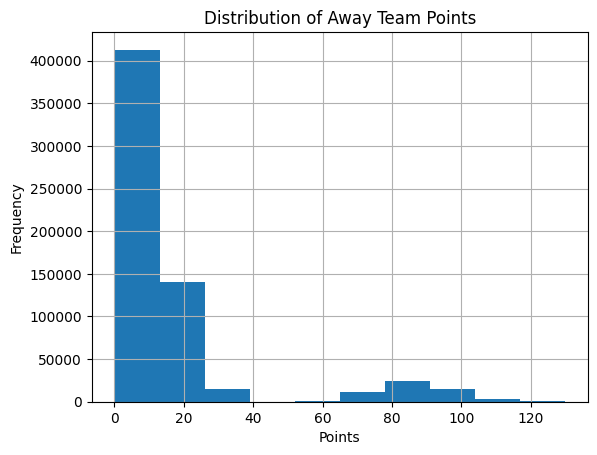

In [8]:
import matplotlib.pyplot as plt

games['PTS_away'].hist()
plt.title('Distribution of Away Team Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()





To compute correlations between each pair of variables and visualize them using a heatmap, we can use the corr() method and the heatmap() function from the Seaborn library:

/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_14868/3446869240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = games.corr()


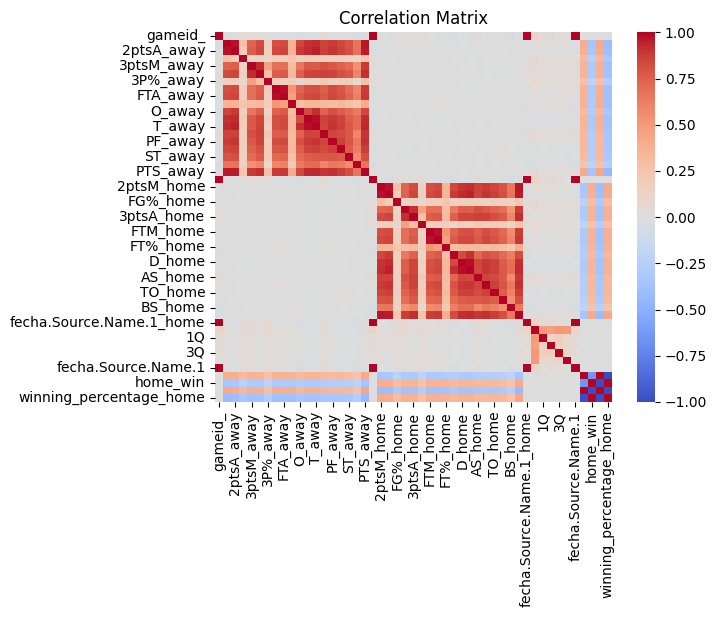

In [9]:
import seaborn as sns
corr_matrix = games.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This will output a heatmap showing the correlation between each pair of variables in our dataset. The darker the color, the stronger the correlation. We can also use the annot=True parameter to show the correlation coefficients in each cell of the heatmap.

After computing the correlations, we can identify the variables that are highly correlated with winning percentages by looking for variables with a high absolute correlation coefficient. We can also visualize the correlations between the winning percentage and other variables using a scatter plot. For example, we can create a scatter plot of the PTS_away variable against the winning_percentage_away variable using the scatter() method:

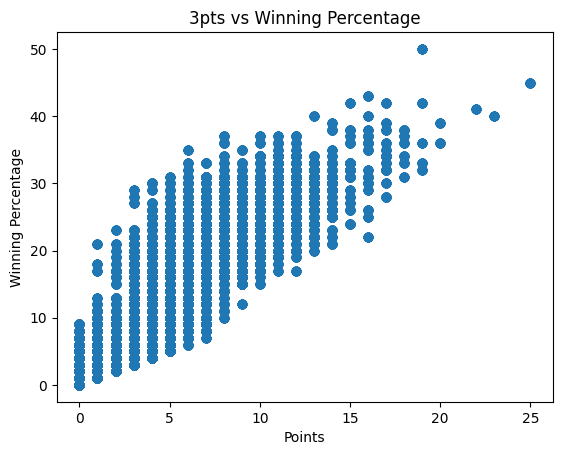

In [10]:
plt.scatter(games['3ptsM_away'], games['3ptsA_away'])
plt.title('3pts vs Winning Percentage')
plt.xlabel('Points')
plt.ylabel('Winning Percentage')
plt.show()



This will output a scatter plot showing the relationship between the PTS_away variable and the winning_percentage_away variable. We can use this plot to visually inspect whether there is a linear relationship between the two variables.